## Titanic Survior Prediction Challenge

In this challenge, we will complete the analysis of what sorts of people were likely to survive the Titanic tragedy. i.e predict which passengers survived the tragedy.

Steps Covered
<ul>
<li>Read data into dataframe.
<li>Explore/Visualize data. Figure our correlation
<li>Clean the data. Replace/Drop NaNs. 
<li>Feature Engineering - Find key features (x's).  
<li>Re-Encode in columns (one hot etc). Add more columns for generate new features. Do for both Test & Train
<li>Use Scikit learn classifiers (try different ones starting with logistic regression) to see performance
<li>Use Neural network approach
<li>....
<li>....
<li>Fine tune the final approach / Algorithm / Method used
<li>Upload to Kaggle
    </ul>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
titanic_df = pd.read_csv("train.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Looks like Age is missing for quite a few entries. We need to fill these values with either mean or median. 

Let's check how many perished vs survived.

342
549


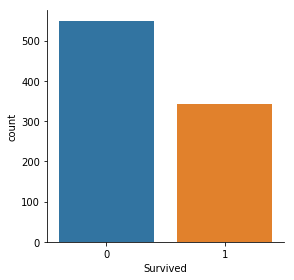

In [5]:

sns.factorplot('Survived',data=titanic_df, kind='count')
print len(titanic_df[titanic_df["Survived"]==1])
print len(titanic_df[titanic_df["Survived"]==0])


Now let's the surival vs perished distributon among men and women.


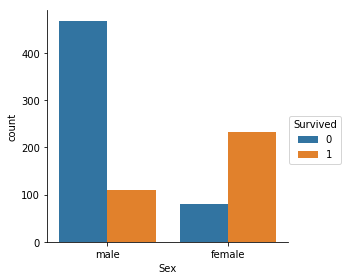

In [6]:
sns.factorplot("Sex", data=titanic_df, kind='count',hue="Survived")


It looks like Males were more likely to persish as compared to women.

Now let's explore males and females from which Passenger Class were more likely to survive vs perish

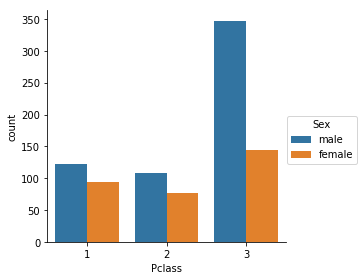

In [7]:
sns.factorplot('Pclass',data=titanic_df,kind='count',hue='Sex')

Looks like there were many more men passengers in 3rd class as compard to the 1st and 2nd class. 

Let's try to find in which passenger class were people (men and women) were more likely to survive vs persish

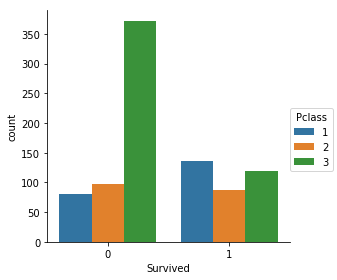

In [8]:
sns.factorplot('Survived',data=titanic_df,kind='count',hue='Pclass')

It also looks like more people from 3rd class perished. The folks who perished increases with class.

Let's cehck which port of embarkment had more likelyhood of surviving vs perishing

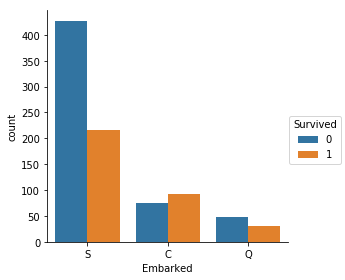

In [9]:
sns.factorplot("Embarked", data=titanic_df, kind='count',hue="Survived")


Seems like People who embarked on port S perished more than the ones those who embarked on C or Q

In order to fill the missing ages we will take a different approach which would be more accurate than just filling all of them with mean.
<ul>
<li>-First pick out all rows with Age unknown (nan). Save to new_df.
<li>-Drop all rows in original titanic_df with age = nan
<li>-Create a new df - df_males_age_nan  from new df
<li>-Create a new df - df_females_age_nan from new_df
<li>-Create df_males_age_nan_master form df_males_age_nan where Name contains "Master". i.e these are boys
<li>-Create df_females_age_nan_miss form df_females_age_nan where Name contains "Miss". i.e these are girls
</ul>


In [12]:

#Get the mean ages from the right distribution
titanic_df_age_nan = titanic_df[titanic_df.Age.isnull()==True]

df_males_age_nan = titanic_df_age_nan[titanic_df_age_nan.Sex == "male"]
df_females_age_nan = titanic_df_age_nan[titanic_df_age_nan.Sex == "female"]

df_males_age_nan_master = df_males_age_nan[df_males_age_nan.Name.str.contains('Master', na = False)]
df_females_age_nan_miss = df_females_age_nan[df_females_age_nan.Name.str.contains('Miss', na = False)]

titanic_df_age_valid = titanic_df[titanic_df.Age.isnull()==False]

df_males_age_valid_master = titanic_df_age_valid[titanic_df_age_valid.Sex == "male"]
df_males_age_valid_master = df_males_age_valid_master[df_males_age_valid_master.Name.str.contains('Master', na = False)]
df_males_age_valid_master = df_males_age_valid_master[df_males_age_valid_master.Age <= 16]

df_females_age_valid_miss = titanic_df_age_valid[titanic_df_age_valid.Sex == "female"]
df_females_age_valid_miss = df_females_age_valid_miss[df_females_age_valid_miss.Name.str.contains('Miss', na = False)]
df_females_age_valid_miss = df_females_age_valid_miss[df_females_age_valid_miss.Age <= 16]

master_age_mean = df_males_age_valid_master.Age.mean()
print master_age_mean

miss_age_mean = df_females_age_valid_miss.Age.mean()
print miss_age_mean


#replace the nan age in master / miss with these means
df_males_age_nan_master.fillna(master_age_mean, inplace=True)
df_females_age_nan_miss.fillna(miss_age_mean, inplace=True)

df_females_age_nan_miss.head(5)


4.57416666667
8.02127659574


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,8.021277,0,0,330959,7.8792,8.02128,Q
32,33,1,3,"Glynn, Miss. Mary Agatha",female,8.021277,0,0,335677,7.7500,8.02128,Q
47,48,1,3,"O'Driscoll, Miss. Bridget",female,8.021277,0,0,14311,7.7500,8.02128,Q
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,8.021277,0,0,330932,7.7875,8.02128,Q
109,110,1,3,"Moran, Miss. Bertha",female,8.021277,1,0,371110,24.1500,8.02128,Q
